<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/201228_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=fJ3CfEwr39k
# Description: Create and plot multiple technical indicators

In [3]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as pdr

In [52]:
ticker = 'NVO'
start_date = '2019-11-25'
end_date = '2020-12-25'
df = pdr.DataReader(ticker, 'yahoo', start_date, end_date)

In [53]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-25,56.270000,55.660000,55.939999,56.250000,1869300.0,55.044823
2019-11-26,56.430000,55.970001,56.080002,56.250000,983000.0,55.044823
2019-11-27,56.509998,56.029999,56.040001,56.360001,1779600.0,55.152462
2019-11-29,56.520000,56.040001,56.470001,56.150002,547100.0,54.946964
2019-12-02,56.160000,55.689999,56.020000,56.020000,831300.0,54.819748


In [54]:
# check the dataframe index
df.index

DatetimeIndex(['2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29',
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-09',
               ...
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24'],
              dtype='datetime64[ns]', name='Date', length=274, freq=None)

In [41]:
# Create functions to calculate SMA and EMA

# Create the SImple Moving Average (SMA)
def SMA(data, period=20, column='Close'):
  return data[column].rolling(window=period).mean()

# Create the Exponential Moving average
def EMA( data, period=20, column='Close'):
  return data[column].ewm(span=period, adjust=False).mean()

#Calcuate the  MACD (Moving Average Convergence-Divergence)
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
  # Calculate the short term exponential moving average
  ShortEMA = EMA(data, period_short, column=column)
  # Caluclate the long term exponential moving average
  LongEMA = EMA(data, period_long, column=column)
  # Calculate the moving average convergence divergence
  data['ShortEMA'] = ShortEMA
  data['LongEMA'] = LongEMA
  data['MACD'] = ShortEMA-LongEMA
  #Calculate the Signal Line
  data['Signal_Line'] = EMA(data, period_signal, column='MACD')

  return data

In [55]:
# Create a function to compute the relative strength index (RSI)
def RSI(data, period=14, column='Close'):
  delta = data[column].diff(1)
  delta = delta[1:] # get rid of the first row
  up = delta.copy()
  down = delta.copy()
  up[up<0] = 0
  down[down>0] = 0
  data['up'] = up
  data['down'] = down
  AVG_Gain = SMA(data, period, column='up')
  AVG_Loss = abs(SMA(data, period, column ='down'))
  RS = AVG_Gain/AVG_Loss # Relative strength
  RSI = 100.0 - (100.0/(1.0 + RS))

  data['RSI'] = RSI

  return data

In [56]:
# Create/add to the dataset
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

In [57]:
df

,High,Low,Open,Close,Volume,Adj Close,ShortEMA,LongEMA,MACD,Signal_Line,up,down,RSI,SMA,EMA
Date,,,,,,,,,,,,,,,
2019-11-25,56.270000,55.660000,55.939999,56.250000,1869300.0,55.044823,56.250000,56.250000,0.000000,0.000000,NaN,NaN,NaN,NaN,56.250000
2019-11-26,56.430000,55.970001,56.080002,56.250000,983000.0,55.044823,56.250000,56.250000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,56.250000
2019-11-27,56.509998,56.029999,56.040001,56.360001,1779600.0,55.152462,56.266923,56.258148,0.008775,0.001755,0.110001,0.000000,NaN,NaN,56.260476
2019-11-29,56.520000,56.040001,56.470001,56.150002,547100.0,54.946964,56.248935,56.250137,-0.001202,0.001164,0.000000,-0.209999,NaN,NaN,56.249955
2019-12-02,56.160000,55.689999,56.020000,56.020000,831300.0,54.819748,56.213714,56.233090,-0.019376,-0.002944,0.000000,-0.130001,NaN,NaN,56.228054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,73.919998,72.639999,73.129997,73.800003,1670400.0,73.800003,70.200986,69.183377,1.017608,0.433331,2.070000,0.000000,77.047887,68.691000,69.460392
2020-12-21,72.080002,71.500000,72.040001,71.900002,1138500.0,71.900002,70.462373,69.384609,1.077764,0.562217,0.000000,-1.900002,65.848384,68.906500,69.692735
2020-12-22,71.250000,70.389999,71.160004,70.620003,864800.0,70.620003,70.486623,69.476119,1.010504,0.651875,0.000000,-1.279999,58.551740,69.067500,69.781047


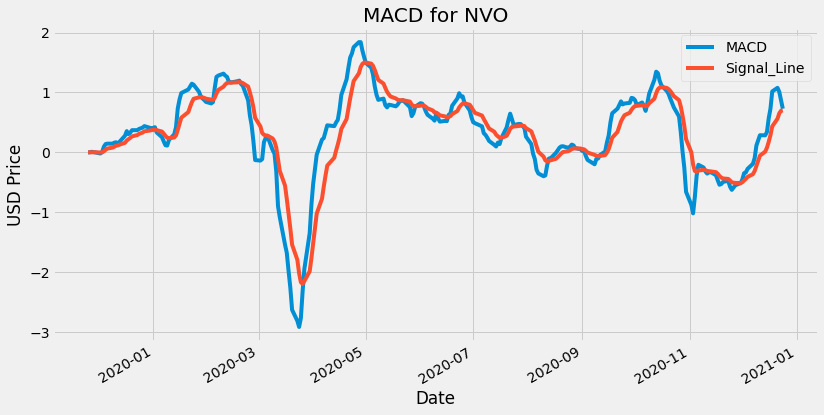

In [58]:
# Plot the charts
# Create a list of columns to keep
column_list = ['MACD', 'Signal_Line']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('MACD for NVO')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

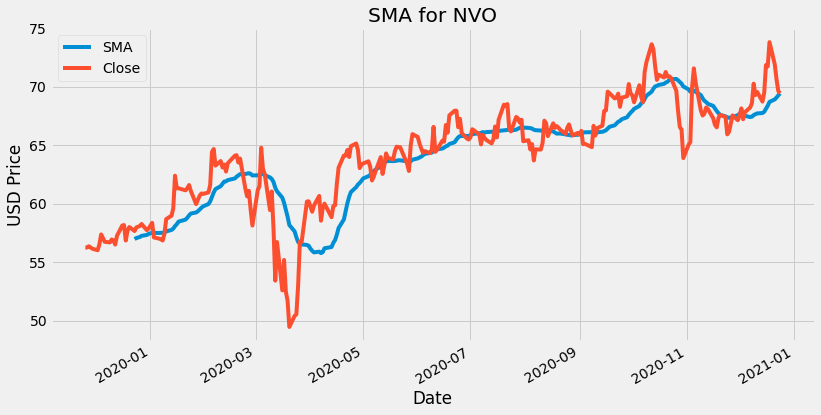

In [59]:
# Plot the charts
# Create a list of columns to keep
column_list = ['SMA', 'Close']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('SMA for NVO')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

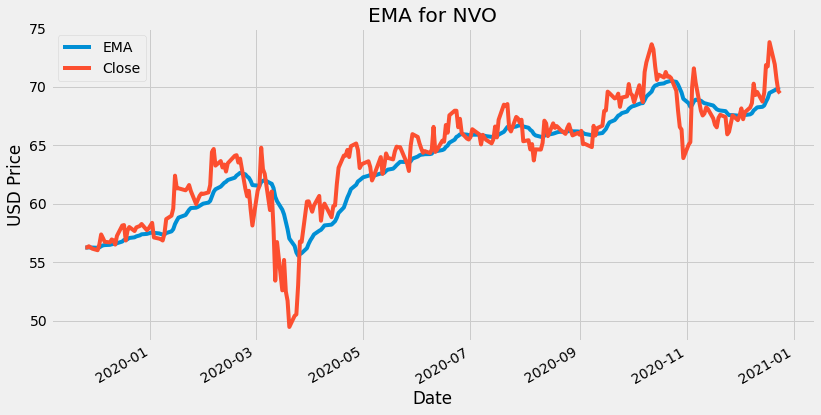

In [60]:
# Plot the charts
# Create a list of columns to keep
column_list = ['EMA', 'Close']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('EMA for NVO')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

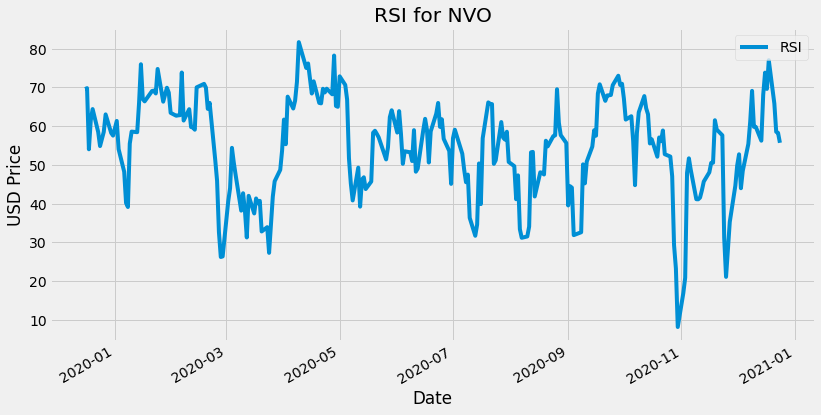

In [61]:
# Plot the charts
# Create a list of columns to keep
column_list = ['RSI']
df[column_list].plot(figsize=(12.2, 6.4))
plt.title('RSI for NVO')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()